In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8') 
df_train.shape, df_test.shape

((24712, 22), (16476, 21))

In [3]:
df_train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [5]:
df_test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
#df_train.drop_duplicates().count(), df_train.count()

In [8]:
df_train = df_train.drop(['_id'], axis=1)
df_test = df_test.drop(['_id'], axis=1)

In [9]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

job
{'housemaid', 'blue-collar', 'admin.', 'services', 'entrepreneur', 'unknown', 'student', 'self-employed', 'unemployed', 'technician', 'retired', 'management'}


marital
{'divorced', 'single', 'unknown', 'married'}


education
{'high.school', 'professional.course', 'basic.6y', 'illiterate', 'unknown', 'university.degree', 'basic.4y', 'basic.9y'}


default
{'no', 'yes', 'unknown'}


housing
{'no', 'unknown', 'yes'}


loan
{'no', 'unknown', 'yes'}


contact
{'telephone', 'cellular'}


month
{'sep', 'mar', 'jun', 'nov', 'aug', 'oct', 'apr', 'dec', 'may', 'jul'}


day_of_week
{'thu', 'fri', 'tue', 'wed', 'mon'}


poutcome
{'nonexistent', 'success', 'failure'}




In [10]:
def my_counter(column):
    x = 0
    for value in df_train[column]:
        if value == 'unknown':
            x+=1
    return x

In [11]:
print('marital:', my_counter('marital'))
print('housing:', my_counter('housing'))
print('loan:', my_counter('loan'))
print('job:', my_counter('job'))
print('education:', my_counter('education'))

marital: 45
housing: 622
loan: 622
job: 197
education: 1060


In [12]:
for i in df_test.columns: # перебираем все столбцы
    if str(df_test[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_test[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

job
{'housemaid', 'blue-collar', 'management', 'admin.', 'services', 'unknown', 'entrepreneur', 'student', 'self-employed', 'technician', 'retired', 'unemployed'}


marital
{'divorced', 'single', 'unknown', 'married'}


education
{'high.school', 'professional.course', 'basic.6y', 'illiterate', 'unknown', 'university.degree', 'basic.4y', 'basic.9y'}


default
{'no', 'yes', 'unknown'}


housing
{'no', 'unknown', 'yes'}


loan
{'no', 'unknown', 'yes'}


contact
{'telephone', 'cellular'}


month
{'sep', 'mar', 'jun', 'nov', 'aug', 'oct', 'apr', 'dec', 'may', 'jul'}


day_of_week
{'thu', 'fri', 'tue', 'wed', 'mon'}


poutcome
{'nonexistent', 'success', 'failure'}




In [13]:
# df_train['marital'][df_train.marital=="divorced"].hist(alpha=0.6, label="divorced", normed=True)
# df_train['marital'][df_train.marital=="married"].hist(alpha=0.6, label="married", normed=True)
# df_train['marital'][df_train.marital=="single"].hist(alpha=0.6, label="single", normed=True)
# df_train['marital'][df_train.marital=="unknown"].hist(alpha=0.6, label="unknown", normed=True)
# plt.legend()
# plt.title("Распределение семейного положения");

In [14]:
# df_train.pivot_table(
#     'target',
#     'marital',
#     ['education']
# ).plot(kind='bar', title='education')

In [15]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop([
        'month',
        'day_of_week',
        'contact'
    ], axis=1)    
    
    df_output.loc[:, ['default', 'housing', 'loan']] = \
    df_output.loc[:, ['default', 'housing', 'loan']].replace({'no': 0, 'yes': 1, 'unknown': -1})
    
    df_output.loc[:, ['poutcome']] = \
    df_output.loc[:, ['poutcome']].replace({'failure': 0, 'success': 1, 'nonexistent': -1})
   
    df_output = pd.get_dummies(df_output, dummy_na = True,  columns=[
        'job',
        'marital',
        'education'  
    ])
        
    return df_output

In [16]:
df_preproc = df_train.pipe(preproc_data)
# df_preproc_test = df_test.pipe(preproc_data)
# df_preproc_train = df_preproc.drop(['target'], axis=1)

In [17]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 42 columns):
age                              24712 non-null int64
default                          24712 non-null int64
housing                          24712 non-null int64
loan                             24712 non-null int64
duration                         24712 non-null int64
campaign                         24712 non-null int64
pdays                            24712 non-null int64
previous                         24712 non-null int64
poutcome                         24712 non-null int64
emp.var.rate                     24712 non-null float64
cons.price.idx                   24712 non-null float64
cons.conf.idx                    24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
target                           24712 non-null int64
job_admin.                       24712 non-null uint8
job_blue-collar  

In [18]:

# data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

In [19]:
df_preproc.shape

(24712, 42)

In [20]:
y = df_preproc['target']
y.shape

(24712,)

In [21]:
X = df_preproc.drop(['target'], axis=1)
X.shape

(24712, 41)

In [4]:
from sklearn.cross_validation import train_test_split

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [25]:
knc = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
])

In [26]:
scaler_knc = StandardScaler()
knc.named_steps['scaler']

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
knc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'))])

In [28]:
knc_predict = knc.predict(X_test)

In [29]:
knc_predict_proba = knc.predict_proba(X_test, )

In [6]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(y_test, knc_predict_proba[:, 1]) # считаем рок аук

0.8346293332327528

In [412]:
scores_test = []
scores_train = []

# roc auc для теста и трейна, посмотрим что будет при разных k (кол-ве ближайших соседей)

for k in range(1, 15):
    # Your Code Here
    
    knc = Pipeline([
        ('scaler', StandardScaler()), # нормиратор
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    knc.fit(X_train, y_train, )
    
    knc_predict_test = knc.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, knc_predict_test[:, 1]))
    
    knc_predict_train = knc.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, knc_predict_train[:, 1]))

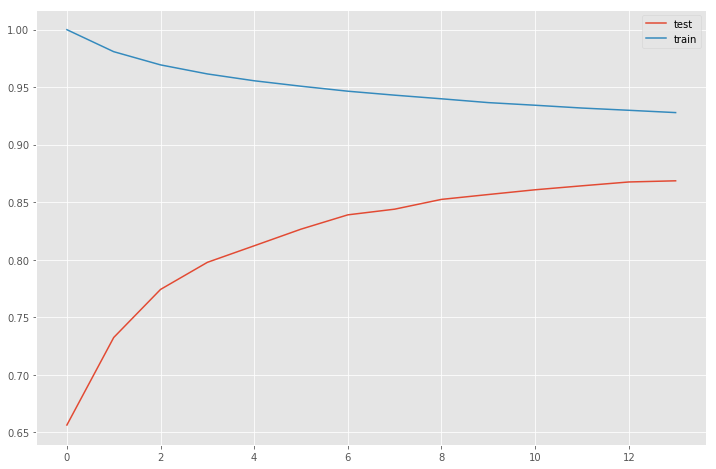

In [486]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

In [ ]:
knn = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())])

knn_params = {
    'knn__n_neighbors': [6],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': range(10, 50, 5) 
}

cv = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)

knn_grid = GridSearchCV(
    knn, 
    knn_params,
    cv=cv, 
    n_jobs=-1,
    verbose=True
)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_
knn_grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 38.9min


In [779]:
knn = Pipeline([
        ('scaler', StandardScaler()), # нормиратор
        ('knn', KNeighborsClassifier(n_neighbors=9))
    ])
knn.fit(X_train, y_train, )
knn_y_proba = knn.predict_proba(X_test, )
roc_auc_score(y_test, knn_y_proba[:, 1])

0.8621257541493588

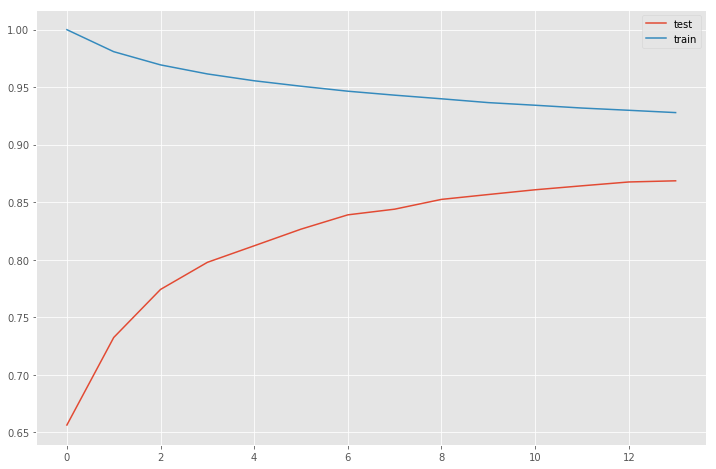

In [416]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

# Дерево

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

In [8]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')
df_train = df_train.drop(['_id'], axis=1)
df_test = df_test.drop(['_id'], axis=1)

In [9]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop([
        'day_of_week',
        'month'
    ], axis=1)    
    
    df_output.loc[:, ['default', 'housing', 'loan']] = \
    df_output.loc[:, ['default', 'housing', 'loan']].replace({'no': 0, 'yes': 1, 'unknown': -1})
    
    df_output.loc[:, ['poutcome']] = \
    df_output.loc[:, ['poutcome']].replace({'failure': 0, 'success': 1, 'nonexistent': -1})
    
    df_output['education'] = df_output['education'].replace({
        'unknown': 1060, 
        'basic.9y': 3565, 
        'illiterate': 7,
        'professional.course': 3112,
        'basic.4y': 2523,
        'university.degree': 7309,
        'high.school': 5737,
        'basic.6y': 1399
    }) 
    
    df_output['marital'] = df_output['marital'].replace({
        'divorced' : 2755,
        'married' : 14871,
        'single' : 7041,
        'unknown' : 45
    })
    df_output['job'] = df_output['job'].replace({
        'admin.' : 6254,
        'blue-collar' : 5621,
        'entrepreneur' : 853,
        'housemaid' : 652,
        'management' : 1758,
        'retired' : 1001,
        'self-employed' : 850,
        'services' : 2391,
        'student' : 554,
        'technician' : 3987,
        'unemployed' : 594,
        'unknown' : 197
})   
    df_output = pd.get_dummies(df_output, dummy_na = True,  columns=[
        'contact'
    ])
        
    return df_output

In [25]:
df_preproc = df_train.pipe(preproc_data)

In [26]:
y = df_preproc['target']

In [27]:
X = df_preproc.drop(['target'], axis=1)

In [37]:
# df_preproc.corr

CorrKoef = df_preproc.corr()
FieldDrop = [i for i in CorrKoef if CorrKoef[i].isnull().drop_duplicates().values[0]]
CorField = []
for i in CorrKoef:
    for j in CorrKoef.index[CorrKoef[i] > 0.9]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print("{}-->{}: r^2={}".format(i, j, CorrKoef[i][CorrKoef.index==j].values[0]))

emp.var.rate-->euribor3m: r^2=0.9723725896285133
emp.var.rate-->nr.employed: r^2=0.9073356475544095


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [14]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

In [29]:
dtc = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)
train_scores, valid_scores = validation_curve(
    dtc, X, y, # модель, данные
    'max_depth', range(1, 10), 
    # гиперпараметр, его интервалы значений
    cv=cv, 
    scoring='roc_auc' # кросвалидация и её показатель качества
) 
                                            

In [16]:
train_scores.shape, valid_scores.shape

((9, 5), (9, 5))

Text(0,0.5,'ROC AUC')

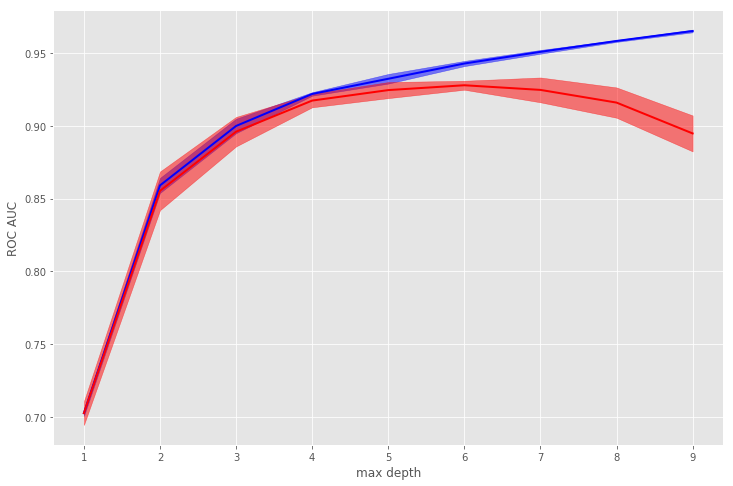

In [1027]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(
    range(1,10), 
    train_score_mean-train_score_std, 
    train_score_mean+train_score_std, 
    color='b',
    interpolate=True, 
    alpha=0.5
)

plt.fill_between(
    range(1,10), 
    valid_scores_mean-valid_scores_std, 
    valid_scores_mean+valid_scores_std, 
    color='r', 
    interpolate=True, 
    alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

In [17]:
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123

In [30]:
param_grid = {
    'criterion': ['gini', 'entropy'], # мера неопределености
    'max_depth': randint(3, 5), # максимальная глубина от 3х до 5 равномерное
    'min_samples_leaf': randint(2, 20), # минимальное кол-во объектов в решине дерева, 
    # достаточное для дробления на части
    'class_weight': [None, 'balanced']} # вес классов (взвешиваем пустые значения)


In [31]:
cv = StratifiedKFold(
    n_splits=5, 
    random_state=123, 
    shuffle=True
) # кроссвалидация
dtc = DecisionTreeClassifier(random_state=42) # модель

random_search = RandomizedSearchCV(dtc, 
                                   param_distributions=param_grid, 
                                   # распредление параметров, заданных в словаре
                                   n_iter=200, # 200 переборов
                                   n_jobs=-1, # чтобы всё считалось в несколько потоков
                                   cv=cv, 
                                   scoring='roc_auc', # показатель качества у нас рок аук 
                                   random_state=42) # вербоус можно указать чтобы писалось в лог
# А дальше, просто .fit()
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a10d75b38>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a10d75908>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [32]:
best_dtc = random_search.best_estimator_
best_dtc

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [33]:
p = random_search.grid_scores_[0]
p

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.90361, std: 0.00550, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 16}

In [34]:
dtc = random_search.best_estimator_ # взяли лучшую можель которая у нас была

In [35]:
imp = dtc.feature_importances_
pd.Series(index=X.columns, data=imp).sort_values()

age                  0.000000
contact_cellular     0.000000
euribor3m            0.000000
contact_telephone    0.000000
campaign             0.000000
loan                 0.000000
contact_nan          0.000000
default              0.000000
education            0.000000
marital              0.000000
job                  0.000000
housing              0.000000
previous             0.000543
poutcome             0.003842
pdays                0.004401
emp.var.rate         0.019753
cons.price.idx       0.043571
cons.conf.idx        0.101856
nr.employed          0.330615
duration             0.495419
dtype: float64

In [36]:
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test, )
roc_auc_score(y_test, dtc_predict_proba[:, 1]) # считаем рок аук

0.9247170202007347

In [975]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = 0.925


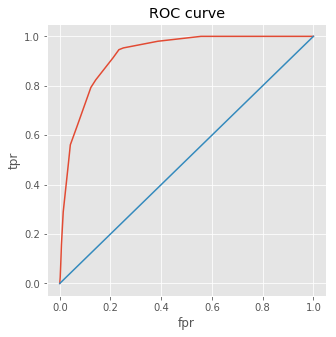

In [799]:
fpr, tpr, th = roc_curve(y_test, dtc_predict_proba[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'predict')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
print('roc_auc = {:.3f}'.format(roc_auc_score(y_test, my_y_proba[:,1])))

In [800]:
X_test.head().T

,23176,22214,15573,9052,19562
age,30.000,38.000,42.000,49.000,40.000
default,0.000,0.000,0.000,0.000,0.000
housing,1.000,1.000,0.000,1.000,1.000
loan,0.000,0.000,0.000,1.000,1.000
duration,292.000,63.000,51.000,185.000,957.000
campaign,1.000,2.000,1.000,2.000,1.000
pdays,-1.000,-1.000,-1.000,-1.000,-1.000
previous,0.000,0.000,0.000,0.000,1.000
poutcome,-1.000,-1.000,-1.000,-1.000,0.000
emp.var.rate,-1.800,1.100,1.100,1.400,-0.100


# xgboost

In [ ]:
import xgboost

In [303]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42)

In [304]:
xgb = xgboost.XGBClassifier()

In [305]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [306]:
predict_xgb = xgb.predict(X_test)

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [309]:
from sklearn.cross_validation import cross_val_score
predict_proba_xgb=xgb.predict_proba(X_test)
cv_xgb = cross_val_score(
    xgb, 
    X,
    y,
    scoring='roc_auc',
    cv=10
)
cv_xgb

array([0.94345155, 0.94690748, 0.94640899, 0.95043287, 0.94272343,
       0.94307256, 0.95493387, 0.95156193, 0.93901548, 0.9452366 ])

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


roc_auc = 0.95


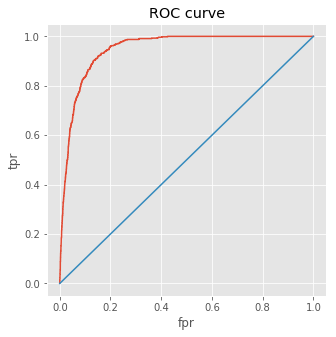

In [419]:
from sklearn.metrics import roc_auc_score, roc_curve
predict = xgb.predict(X_test)
predict_proba = xgb.predict_proba(X_test) 

fpr, tpr, th = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'predict')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
print('roc_auc = {:.2f}'.format(roc_auc_score(y_test, predict_proba[:,1])))

# Логистическая регрессия

In [580]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [801]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [582]:
# param_grid = {
#     'penalty': randint(10, 15),
#     'C': randint(-3, 10)
# }
# lr = Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', LogisticRegression(
#             penalty='l1', 
#             fit_intercept=True, 
#             C=C))
#     ])

c_params = np.logspace(-3, 3, 10)

for C in c_params:
    lr = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l1', fit_intercept=True, C=C))
    ])

lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [583]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

0.9241554101145799

In [25]:
try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold
    
    
try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


In [853]:
lr = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression())
    ])

In [854]:
lr_params = {
    'clf__C': np.linspace(11, 100, 10),
    'clf__penalty': ['l2'],
    'clf__solver': ['newton-cg', 'liblinear', 'saga', 'sag', 'lbfgs']
}

In [855]:
# c_range = np.logspace(-3, 3, 10)
# for C in c_range:
#     model = Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', LogisticRegression(penalty='l1', fit_intercept=True, C=C))
#     ])
# model.fit(X_train, y_train)

In [856]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [857]:
lr_grid = GridSearchCV(
    lr, 
    lr_params,
    cv=cv, 
    n_jobs=-1,
    verbose=True
)

# LogisticRegressionCV
# LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
# lr_cv = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=[0.01, 0.001], refit=True)

In [861]:
# lr_grid = LogisticRegressionCV(Cs=np.logspace(-3, 3, 10), cv=cv, verbose=1, n_jobs=-1)

# lr_grid = GridSearchCV(
#     lr, 
#     lr_params,
#     cv=cv, 
#     n_jobs=-1,
#     verbose=True
# )
# import time
# from tqdm import tqdm_notebook

# tqdm_notebook(lr_grid.fit(X_train, y_train))

In [858]:
lr_grid.fit(X_train, y_train)
lr_grid.best_params_, lr_grid.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: T

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: T

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Vitalina/anaconda3/lib/python3.6/site-p

({'clf__C': 11.0, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'},
 0.9082907582578785)

In [859]:
lr = lr_grid.best_estimator_
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test) 
roc_auc_score(y_test, lr_predict_proba[:,1])

0.9215578073215009

In [860]:
lr_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('clf',
   LogisticRegression(C=11.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
             verbose=0, warm_start=False))],
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'clf': LogisticRegression(C=11.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
           verbose=0, warm_start=False),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'clf__C': 11.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__max_iter': 100,
 'clf__multi_class': 'ovr',
 'clf__

roc_auc = 0.92


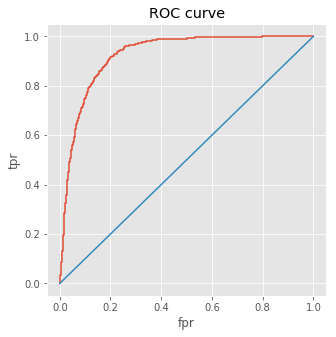

In [802]:
fpr, tpr, th = roc_curve(y_test, lr_predict_proba[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'predict')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
print('roc_auc = {:.2f}'.format(roc_auc_score(y_test, lr_predict_proba[:,1])))

# ЛЕС

In [676]:
df_preproc_test = df_test.pipe(preproc_data)
lr_predict = lr.predict(df_preproc_test)

In [715]:
from sklearn.ensemble import RandomForestClassifier

In [752]:
rf = RandomForestClassifier()
rf_params = {
    'max_features': range(1, 50, 10),
    'min_samples_split': range(2, 8), 
    'min_samples_leaf': range(10, 20,2), 
    'max_depth': range(5, 20,2),
    'criterion': ['entropy', 'gini'],
    'n_estimators': range(10, 50, 10)
}

In [753]:
rf_grid = GridSearchCV(
    rf, 
    rf_params,
    cv=cv, 
    n_jobs=-1,
    verbose=True
)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1568 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2768 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3518 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 5318 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 6368 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 7518 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 8768 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 10118 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 11568 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 13118 tasks      | elapsed: 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(1, 50, 10), 'min_samples_split': range(2, 8), 'min_samples_leaf': range(10, 20, 2), 'max_depth': range(5, 20, 2), 'criterion': ['entropy', 'gini'], 'n_estimators': range(10, 50, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [754]:
rf = rf_grid
rf_predict = rf.predict(X_test)
rf_predict_proba = rf.predict_proba(X_test) 
roc_auc_score(y_test, rf_predict_proba[:,1])

0.9379904328190058